In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
import xgboost as xgb
from xgboost import XGBClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

#PREDICT THE SERVER WILL BE HACKED? 

#Binary Class Classification

In [ ]:
#1:Yes,0:NO

In [53]:
train =pd.read_csv('/content/Train.csv')
test =pd.read_csv('/content/Test.csv')


In [116]:
test =pd.read_csv('/content/Test.csv')


In [4]:
test.shape

(15903, 17)

In [5]:
train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [ ]:
test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

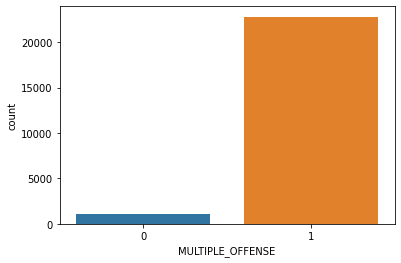

In [ ]:
import seaborn as sns
sns.countplot(train['MULTIPLE_OFFENSE'])

#Imbalance Class

In [ ]:
train['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [ ]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [ ]:
import datetime as dt
train.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

In [ ]:
test.dtypes

INCIDENT_ID            object
DATE           datetime64[ns]
X_1                     int64
X_2                     int64
X_3                     int64
X_4                     int64
X_5                     int64
X_6                     int64
X_7                     int64
X_8                     int64
X_9                     int64
X_10                    int64
X_11                    int64
X_12                  float64
X_13                    int64
X_14                    int64
X_15                    int64
dtype: object

In [ ]:
train['DATE']=pd.to_datetime(train['DATE'])
test['DATE']=pd.to_datetime(test['DATE'])

In [ ]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [ ]:
train['DATE']=pd.to_datetime(train['DATE'],format='%d-%m%-y',dayfirst=True)
test['DATE']=pd.to_datetime(test['DATE'],format='%d-%m%-y',dayfirst=True)

In [ ]:
train =train.sort_values(by='DATE') 

In [ ]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
19022,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1
13104,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1
1617,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1
6187,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1
1761,CR_821,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1


In [ ]:
train =train.drop(['INCIDENT_ID'], axis = 1) 

In [ ]:
train.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
19022,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1
13104,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1
1617,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1
6187,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1
1761,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1


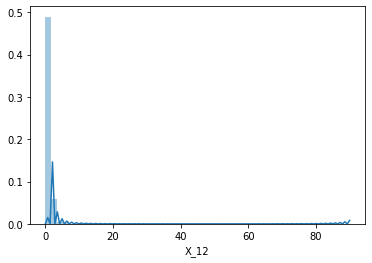

In [ ]:
sns.distplot(train['X_12'])

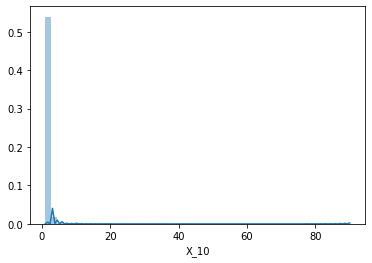

In [ ]:
sns.distplot(train['X_10'])

In [ ]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e90efab38>,
      dtype=object)

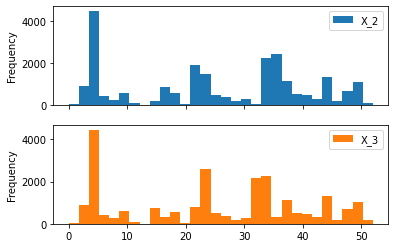

In [ ]:
train[["X_2", "X_3"]].plot(bins=30, kind="hist",subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e91026518>,
      dtype=object)

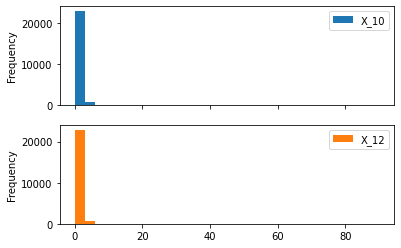

In [ ]:
train[["X_10", "X_12"]].plot(bins=30, kind="hist",subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e90f2f898>,
      dtype=object)

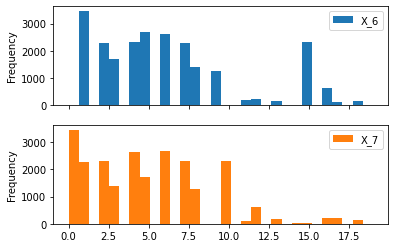

In [ ]:
train[["X_6", "X_7"]].plot(bins=30, kind="hist",subplots=True)

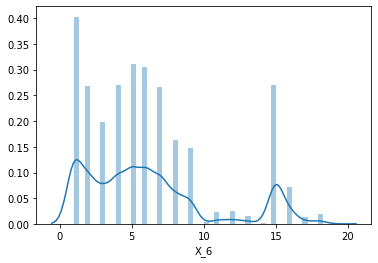

In [ ]:
sns.distplot(train['X_6'])

Features like (X_10,X_12) & (X_3,X_2) ,(X_6,X_7) have Similar Distributions  

In [ ]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 16 numeric and 2 categorical columns in train data


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


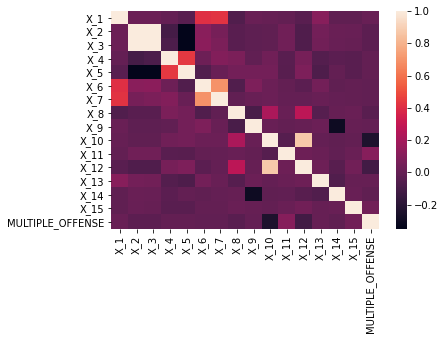

In [ ]:
#correlation plot
import seaborn as sns
corr = numeric_data.corr()
sns.heatmap(corr)

In [ ]:
print (corr['MULTIPLE_OFFENSE'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['MULTIPLE_OFFENSE'].sort_values(ascending=False)[-5:]) #last 5 values

MULTIPLE_OFFENSE    1.000000
X_11                0.105088
X_15                0.044916
X_1                 0.014034
X_13                0.006512
X_9                -0.000748
X_4                -0.002921
X_5                -0.003450
X_6                -0.007903
X_7                -0.008036
X_14               -0.015267
X_3                -0.027218
X_2                -0.027293
X_8                -0.033397
X_12               -0.113061
Name: MULTIPLE_OFFENSE, dtype: float64 

----------------------
X_3    -0.027218
X_2    -0.027293
X_8    -0.033397
X_12   -0.113061
X_10   -0.242596
Name: MULTIPLE_OFFENSE, dtype: float64


No correaltion between dependent & Independent Variables 

In [ ]:
print (corr['X_12'].sort_values(ascending=False)[:15], '\n')

X_12    1.000000
X_10    0.877743
X_8     0.273107
X_5     0.082068
X_4     0.059135
X_15    0.044005
X_13    0.030012
X_11    0.027363
X_9     0.005150
X_7    -0.000409
X_6    -0.031258
X_1    -0.034835
X_14   -0.042033
X_3    -0.064872
X_2    -0.067720
Name: X_12, dtype: float64 



In [ ]:
print (corr['X_6'].sort_values(ascending=False)[:15], '\n')

X_6                 1.000000
X_7                 0.695243
X_1                 0.409876
X_3                 0.124662
X_2                 0.119718
X_9                 0.079192
X_13                0.047845
X_4                 0.028929
X_10                0.021186
X_11               -0.002990
X_15               -0.006621
MULTIPLE_OFFENSE   -0.007903
X_14               -0.013155
X_12               -0.031258
X_5                -0.062784
Name: X_6, dtype: float64 



In [ ]:
print (corr['X_2'].sort_values(ascending=False)[:15], '\n')

X_2                 1.000000
X_3                 0.996985
X_6                 0.119718
X_7                 0.058806
X_13                0.046668
X_11                0.038003
X_1                 0.021999
X_14                0.015194
X_15                0.013822
X_10               -0.016710
X_9                -0.017749
MULTIPLE_OFFENSE   -0.027293
X_8                -0.038174
X_12               -0.067720
X_4                -0.104321
Name: X_2, dtype: float64 



# There is a Collinearity between the independent variables 

#Base Model

In [6]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selis_month_startection import train_test_split
from sklearn.metrics import f1_score,recall_score,precision_score


In [ ]:
train_df.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
19022,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1
13104,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1
1617,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1
6187,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1
1761,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1


In [ ]:
train_df =trainNeural Networks, Ensemble Methods, Feature selection techniques etc
Understanding of advanced algorithms (i.e. Deep Learning, Probabilistic Graph Models) will be good to have

In [ ]:
df =train_df.drop(['INCIDENT_ID','DATE','MULTIPLE_OFFENSE',], axis = 1) 

In [ ]:

df.head()


,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43


In [ ]:
train_df['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [ ]:
# splitting data into training and validation set(@[A-Za-z0-9]+)
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(df,train_df['MULTIPLE_OFFENSE'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [ ]:
Base model (without perform any preprocessing and balancing of class  )
#Using random Parameters

In [ ]:
xgb = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=1,
                    min_child_weight=3,
                    gamma=1.2,
                    subsample=0.9,
                    colsample_bytree=0.6,
                  
                    objective='binary:logistic',
                    seed=27).fit(xtrain_bow, ytrain)

In [ ]:

print(xgb.feature_importances_)


[0.0113524  0.0159463  0.05642483 0.         0.         0.
 0.         0.         0.         0.61135584 0.09923249 0.10010254
 0.02475056 0.         0.08083504]


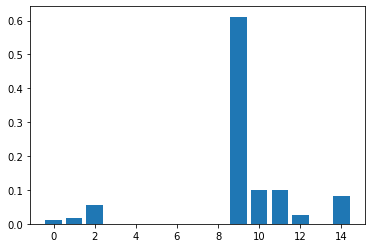

In [ ]:
# plot
from matplotlib import pyplot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

Based on Xgboost Feature Imporantce we can say that X_10 have more Imporatant feature among All others ,X_11& X_13 & X_15 also have Importance

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
prediction = xgb.predict(xvalid_bow)
recall_score(yvalid, prediction, average='binary')

0.9985320023487962

In [ ]:
prediction = xgb.predict(xvalid_bow)
precision_score(yvalid, prediction, average='binary')

0.9985320023487962

In [ ]:
prediction = xgb.predict(xvalid_bow)
f1_score(yvalid, prediction, average='binary')

0.9985320023487962

#Base Model We are getting great Accuracy on validation data

Testing Base model on Unseen Data That is Test Data

In [ ]:
test_df =  test.drop(['INCIDENT_ID','DATE'], axis = 1) 

In [ ]:

test_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [ ]:
prediction_1 = xgb.predict(test_df)

In [ ]:
resul =pd.DataFrame()

In [ ]:
'''
resul =pd.DataFrame()
resul['INCIDENT_ID']  = test['INCIDENT_ID']
resul['MULTIPLE_OFFENSE']  = prediction_1 
resul.to_csv('sub3.csv',index=False)

'''

In [ ]:
resul['INCIDENT_ID']  = test['INCIDENT_ID']

In [ ]:
resul['MULTIPLE_OFFENSE']  = prediction_1 

In [ ]:
#columns_titles = ["MULTIPLE_OFFENSE","INCIDENT_ID"]
#resul=resul.reindex(columns=columns_titles)

In [ ]:

resul.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [ ]:
resul.to_csv('sub3.csv',index=False)

In [ ]:
resul['MULTIPLE_OFFENSE'].value_counts()

1    15174
0      729
Name: MULTIPLE_OFFENSE, dtype: int64

#Base model performs pretty good on unseen Data ,got 98.47 accuracy

#EDA

In [7]:
train.isnull().any()


INCIDENT_ID         False
DATE                False
X_1                 False
X_2                 False
X_3                 False
X_4                 False
X_5                 False
X_6                 False
X_7                 False
X_8                 False
X_9                 False
X_10                False
X_11                False
X_12                 True
X_13                False
X_14                False
X_15                False
MULTIPLE_OFFENSE    False
dtype: bool

In [ ]:
test.isnull().any()

INCIDENT_ID    False
DATE           False
X_1            False
X_2            False
X_3            False
X_4            False
X_5            False
X_6            False
X_7            False
X_8            False
X_9            False
X_10           False
X_11           False
X_12            True
X_13           False
X_14           False
X_15           False
dtype: bool

In [44]:
data = train.append(test, ignore_index=True)

In [45]:
data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0.0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1.0
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1.0
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1.0
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1.0


In [ ]:
data.shape

(39759, 18)

Imputing Missnig Values

In [ ]:
data.isnull().sum()month 	

INCIDENT_ID             0
DATE                    0
X_1                     0
X_2                     0
X_3                     0
X_4                     0
X_5                     0
X_6                     0
X_7                     0
X_8                     0
X_9                     0
X_10                    0
X_11                    0
X_12                  309
X_13                    0
X_14                    0
X_15                    0
MULTIPLE_OFFENSE    15903
dtype: int64

In [ ]:
#missing value counts in each of these columns
miss = data.isnull().sum()/len(train)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

X_12                0.012953
MULTIPLE_OFFENSE    0.666625
dtype: float64

# 0.0129is the missing value percentage so we can remove missing values

In [46]:
data.dropna(subset=['X_12'],  inplace=True)

In [54]:
train.dropna(subset=['X_12'],  inplace=True)
test.dropna(subset=['X_12'],  inplace=True)

In [10]:
data.shape

(39450, 18)

#Outlier Detection & deletion

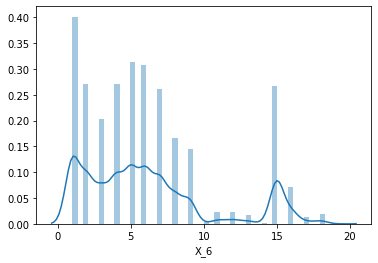

In [ ]:
sns.distplot(data['X_6'])

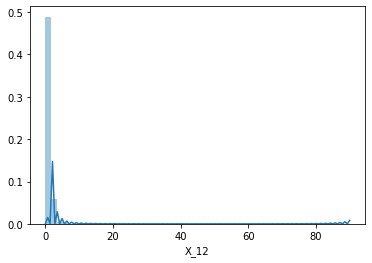

In [ ]:
sns.distplot(data['X_12'])

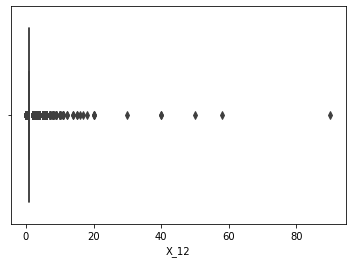

In [ ]:
import seaborn as sns
sns.boxplot(data['X_12'])

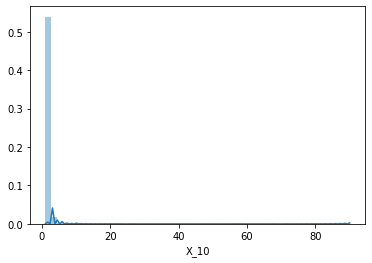

In [ ]:
sns.distplot(data['X_10'])

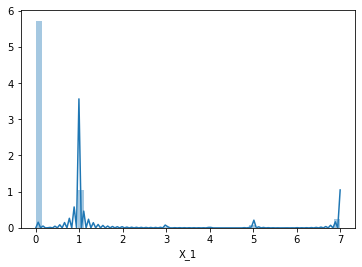

In [ ]:
sns.distplot(data['X_1'])

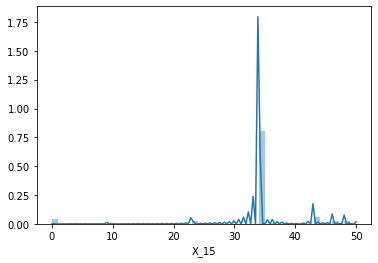

In [ ]:
sns.distplot(data['X_15'])

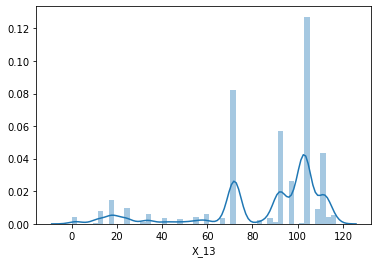

In [ ]:
sns.distplot(data['X_13'])

In [ ]:
data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,39450.000000,23674.000000
mean,0.474094,24.762003,24.616020,4.283752,2.455311,6.132852,4.876933,0.980659,4.918099,1.245120,207.190418,0.973333,85.243676,72.421774,33.455387,0.954887
std,1.422506,15.246067,15.146607,2.960117,1.964782,4.461912,3.870189,1.464808,1.371170,1.021055,93.360658,1.060945,27.511135,43.408878,8.250311,0.207556
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,117.000000,142.000000,50.000000,1.000000


From the above plots & describe Function we can observe that outliers are there ,but based univariate analysis we can remove data means we have to remove so many data points so beacuse of that I'm not performing any deletion





Date Column

In [ ]:
data.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0.0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1.0
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1.0
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1.0
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1.0


In [ ]:
data.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE    float64
dtype: object

In [56]:
#data['DATE']=pd.to_datetime(data['DATE'])
train['DATE']=pd.to_datetime(train['DATE'])
test['DATE']=pd.to_datetime(test['DATE'])

In [118]:
test['DATE'] = pd.to_datetime(test.DATE,format='%d-%m-%y')

In [58]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [59]:
train =train.sort_values(by='DATE')
#test =test.sort_values(by='DATE')

In [60]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
19022,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1
13104,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1
1617,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1
6187,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1
1761,CR_821,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1


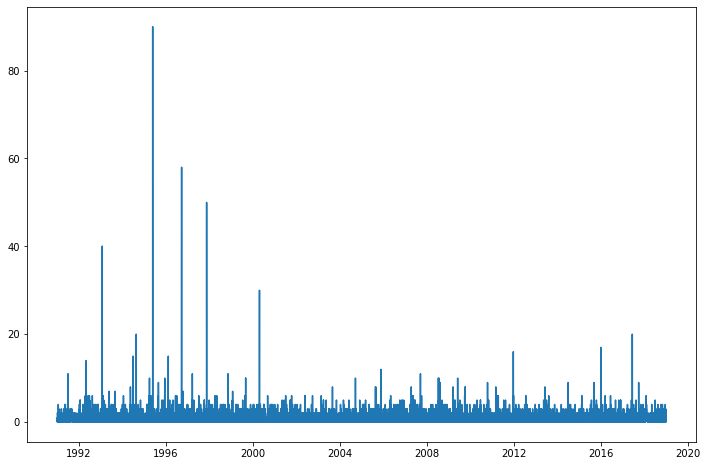

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
train.index = train['DATE']
plt.figure(figsize=(12,8))
plt.plot(train['X_12'])df.reset_index(drop=True, inplace=True)

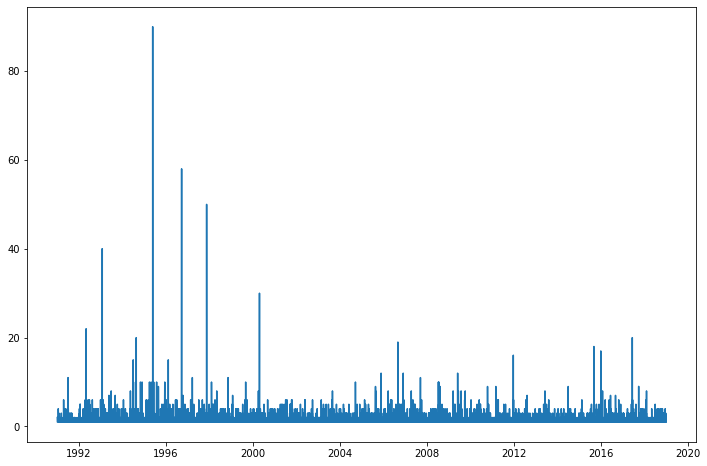

In [63]:
plt.figure(figsize=(12,8))
plt.plot(train['X_10'])

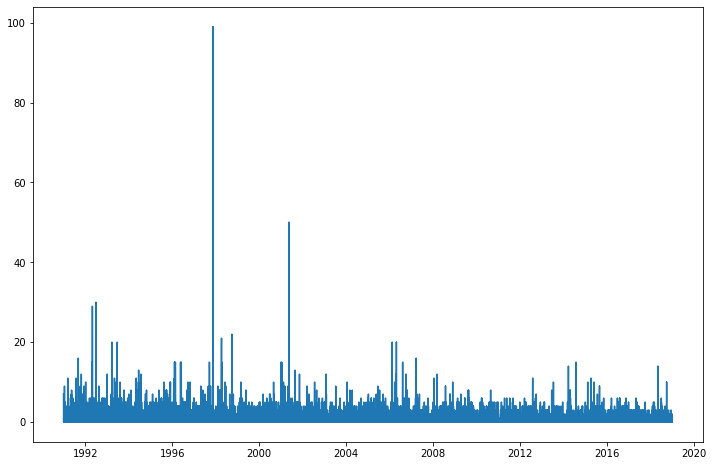

In [64]:
plt.figure(figsize=(12,8))
plt.plot(train['X_8'])

#Except above three features ,remaining features don't have any pattern  with respect to time

In [65]:
df_1 = train

 # break apart the date and get the year, month, week of year, day of month

In [66]:

df_1['dayofweek'] = df_1['DATE'].dt.dayofweek
df_1['quarter'] = df_1['DATE'].dt.quarter
df_1['month'] = df_1['DATE'].dt.month
df_1['year'] = df_1['DATE'].dt.year
df_1['dayofyear'] = df_1['DATE'].dt.dayofyear
df_1['dayofmonth'] = df_1['DATE'].dt.day
df_1['week'] = df_1['DATE'].dt.week
df_1['is_month_start']=df_1['DATE'].dt.is_month_start
df_1['is_month_end']=df_1['DATE'].dt.is_month_end
df_1['is_quarter_start']=df_1['DATE'].dt.is_quarter_start
df_1['is_quarter_end']=df_1['DATE'].dt.is_quarter_end
df_1['is_year_start']=df_1['DATE'].dt.is_year_start
df_1['is_year_end']=df_1['DATE'].dt.is_year_end
df_1['Semester'] = np.where(df_1['quarter'].isin([1,2]),1,2)

In [68]:
df_1.shape

(23674, 32)

In [69]:
df_1.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'week', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'Semester'],
      dtype='object')

In [70]:
df_1[[  'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'week', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'Semester']]

,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Semester
DATE,,,,,,,,,,,,,,
1991-01-01,1,1,1,1991,1,1,1,True,False,True,False,True,False,1
1991-01-02,2,1,1,1991,2,2,1,False,False,False,False,False,False,1
1991-01-03,3,1,1,1991,3,3,1,False,False,False,False,False,False,1
1991-01-04,4,1,1,1991,4,4,1,False,False,False,False,False,False,1
1991-01-05,5,1,1,1991,5,5,1,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-28,4,4,12,2018,362,28,52,False,False,False,False,False,False,2
2018-12-29,5,4,12,2018,363,29,52,False,False,False,False,False,False,2
2018-12-29,5,4,12,2018,363,29,52,False,False,False,False,False,False,2


In [71]:
df_1.groupby('month').size()


month
1     1721
2     1700
3     1979
4     2102
5     2128
6     2099
7     2144
8     2091
9     2270
10    2124
11    1838
12    1478
dtype: int64

In [21]:
df_1.groupby('dayofweek').size()

dayofweek
0    5792
1    5604
2    5495
3    5584
4    5990
5    5622
6    5363
dtype: int64

In [22]:
def calc_prevalence(y):
 return (sum(y)/len(y))

In [72]:
df_1.groupby('year').apply(lambda g:calc_prevalence(g.MULTIPLE_OFFENSE.values))

year
1991    0.970703
1992    0.973485
1993    0.968815
1994    0.964088
1995    0.940334
1996    0.936538
1997    0.940126
1998    0.941922
1999    0.960694
2000    0.958661
2001    0.959528
2002    0.964455
2003    0.962921
2004    0.962096
2005    0.957617
2006    0.946411
2007    0.941307
2008    0.953241
2009    0.944588
2010    0.955300
2011    0.951252
2012    0.952612
2013    0.970128
2014    0.970501
2015    0.961111
2016    0.944818
2017    0.953905
2018    0.945726
dtype: float64

In [73]:
df_1.groupby('month').apply(lambda g:calc_prevalence(g.MULTIPLE_OFFENSE.values))

month
1     0.947124
2     0.959412
3     0.957049
4     0.952426
5     0.945959
6     0.953788
7     0.957090
8     0.956002
9     0.965639
10    0.954802
11    0.958107
12    0.948579
dtype: float64

In [74]:
df_1.groupby('dayofweek').apply(lambda g:calc_prevalence(g.MULTIPLE_OFFENSE.values))

dayofweek
0    0.953622
1    0.958433
2    0.957323
3    0.957660
4    0.962625
5    0.950726
6    0.942927
dtype: float64

From the above three values we can say that the y values equally distributed among year & month & day.that means the dependent value  does not effected by Time.

In [77]:
df_1.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Semester
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1,1,1,1,1991,1,1,1,True,False,True,False,True,False,1
1991-01-02,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1,2,1,1,1991,2,2,1,False,False,False,False,False,False,1
1991-01-03,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1,3,1,1,1991,3,3,1,False,False,False,False,False,False,1
1991-01-04,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1,4,1,1,1991,4,4,1,False,False,False,False,False,False,1
1991-01-05,CR_821,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1,5,1,1,1991,5,5,1,False,False,False,False,False,False,1


In [75]:
df_1.dtypes

INCIDENT_ID                 object
DATE                datetime64[ns]
X_1                          int64
X_2                          int64
X_3                          int64
X_4                          int64
X_5                          int64
X_6                          int64
X_7                          int64
X_8                          int64
X_9                          int64
X_10                         int64
X_11                         int64
X_12                       float64
X_13                         int64
X_14                         int64
X_15                         int64
MULTIPLE_OFFENSE             int64
dayofweek                    int64
quarter                      int64
month                        int64
year                         int64
dayofyear                    int64
dayofmonth                   int64
week                         int64
is_month_start                bool
is_month_end                  bool
is_quarter_start              bool
is_quarter_end      

In [80]:
df_2 = pd.get_dummies(df_1, columns=['is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end','Semester'])

In [82]:
df_2.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start_False,is_month_start_True,is_month_end_False,is_month_end_True,is_quarter_start_False,is_quarter_start_True,is_quarter_end_False,is_quarter_end_True,is_year_start_False,is_year_start_True,is_year_end_False,is_year_end_True,Semester_1,Semester_2
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1,1,1,1,1991,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0
1991-01-02,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1,2,1,1,1991,2,2,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1991-01-03,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1,3,1,1,1991,3,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1991-01-04,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1,4,1,1,1991,4,4,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1991-01-05,CR_821,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1,5,1,1,1991,5,5,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [83]:
df_2.dtypes

INCIDENT_ID                       object
DATE                      datetime64[ns]
X_1                                int64
X_2                                int64
X_3                                int64
X_4                                int64
X_5                                int64
X_6                                int64
X_7                                int64
X_8                                int64
X_9                                int64
X_10                               int64
X_11                               int64
X_12                             float64
X_13                               int64
X_14                               int64
X_15                               int64
MULTIPLE_OFFENSE                   int64
dayofweek                          int64
quarter                            int64
month                              int64
year                               int64
dayofyear                          int64
dayofmonth                         int64
week            

In [84]:
numeric_data = df_2.select_dtypes(include=[np.number])
cat_data = df_2.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 37 numeric and 2 categorical columns in train data


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


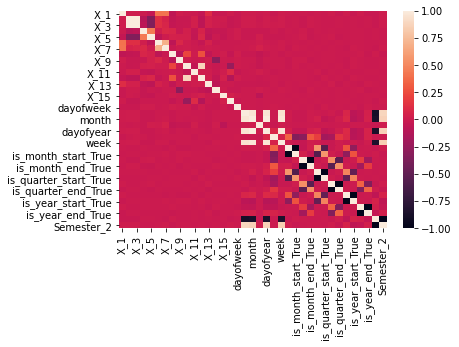

In [85]:
#correlation plot
import seaborn as sns
corr = numeric_data.corr()
sns.heatmap(corr)

In [135]:
print (corr['month'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['X_12'].sort_values(ascending=False)[-5:]) #last 5 values

month                     1.000000
dayofyear                 0.996173
week                      0.972959
quarter                   0.968610
Semester_2                0.863007
is_year_start_False       0.093684
is_year_end_True          0.054247
is_quarter_start_False    0.040794
X_3                       0.020237
X_2                       0.019845
year                      0.016137
is_quarter_end_True       0.015687
X_1                       0.012833
X_7                       0.009841
is_month_start_False      0.009121
Name: month, dtype: float64 

----------------------
X_1                -0.034835
X_14               -0.042033
X_3                -0.064872
X_2                -0.067720
MULTIPLE_OFFENSE   -0.113061
Name: X_12, dtype: float64


#From the values we can conclude that time features don't have any correlation with Y 

Simply we tune a model with time features

In [87]:
df_2.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start_False,is_month_start_True,is_month_end_False,is_month_end_True,is_quarter_start_False,is_quarter_start_True,is_quarter_end_False,is_quarter_end_True,is_year_start_False,is_year_start_True,is_year_end_False,is_year_end_True,Semester_1,Semester_2
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1,1,1,1,1991,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0
1991-01-02,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1,2,1,1,1991,2,2,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1991-01-03,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1,3,1,1,1991,3,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1991-01-04,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1,4,1,1,1991,4,4,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1991-01-05,CR_821,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1,5,1,1,1991,5,5,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [89]:
df_3 = df_2

In [96]:
df_2.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start_False,is_month_start_True,is_month_end_False,is_month_end_True,is_quarter_start_False,is_quarter_start_True,is_quarter_end_False,is_quarter_end_True,is_year_start_False,is_year_start_True,is_year_end_False,is_year_end_True,Semester_1,Semester_2
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991-01-01,CR_1141,1991-01-01,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1,1,1,1,1991,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0
1991-01-02,CR_2248,1991-01-02,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,1,2,1,1,1991,2,2,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1991-01-03,CR_3131,1991-01-03,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,1,3,1,1,1991,3,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1991-01-04,CR_3546,1991-01-04,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,1,4,1,1,1991,4,4,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1991-01-05,CR_821,1991-01-05,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,1,5,1,1,1991,5,5,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [90]:
df_3 =df_3.drop(['INCIDENT_ID','DATE','MULTIPLE_OFFENSE',], axis = 1) 

In [94]:
df_3.reset_index(drop=True, inplace=True)

In [95]:
df_3.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start_False,is_month_start_True,is_month_end_False,is_month_end_True,is_quarter_start_False,is_quarter_start_True,is_quarter_end_False,is_quarter_end_True,is_year_start_False,is_year_start_True,is_year_end_False,is_year_end_True,Semester_1,Semester_2
0,0,22,22,7,3,8,3,7,2,2,0,2.0,72,142,34,1,1,1,1991,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,1,0
1,0,33,32,2,1,7,1,1,6,1,249,1.0,72,142,34,2,1,1,1991,2,2,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,1,36,34,2,1,15,10,0,5,1,174,0.0,92,93,0,3,1,1,1991,3,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,0,39,39,6,5,8,3,1,6,1,0,1.0,72,62,34,4,1,1,1991,4,4,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,1,22,22,7,3,15,10,0,5,1,174,0.0,103,93,48,5,1,1,1991,5,5,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [98]:
# splitting data into training and validation set(@[A-Za-z0-9]+)
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(df_3,df_2['MULTIPLE_OFFENSE'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [99]:
xgb = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=1,
                    min_child_weight=3,
                    gamma=1.2,
                    subsample=0.9,
                    colsample_bytree=0.6,
                  
                    objective='binary:logistic',
                    seed=27).fit(xtrain_bow, ytrain)

In [101]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
prediction = xgb.predict(xvalid_bow)
recall_score(yvalid, prediction, average='binary')

0.9986758864204797

#using Time features also model gives best result on validation data,Let'us test on test data (unseen data)

In [102]:
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
3319,CR_3153,1991-01-02,1,36,34,2,1,15,10,1,6,1,249,1.0,92,93,34
6576,CR_1413,1991-01-03,0,25,25,9,0,3,5,0,5,1,316,1.0,18,142,34
3824,CR_3882,1991-01-04,5,40,40,2,1,16,12,1,5,1,249,1.0,92,29,34
4559,CR_2498,1991-01-05,1,36,34,2,1,15,10,0,5,1,249,1.0,92,93,34
518,CR_1083,1991-01-10,1,22,22,7,3,15,10,1,6,1,316,1.0,72,62,34


In [119]:
df_test = test

In [120]:
df_test['dayofweek'] = df_test['DATE'].dt.dayofweek
df_test['quarter'] = df_test['DATE'].dt.quarter
df_test['month'] = df_test['DATE'].dt.month
df_test['year'] = df_test['DATE'].dt.year
df_test['dayofyear'] = df_test['DATE'].dt.dayofyear
df_test['dayofmonth'] = df_test['DATE'].dt.day
df_test['week'] = df_test['DATE'].dt.week
df_test['is_month_start']=df_test['DATE'].dt.is_month_start
df_test['is_month_end'] = df_test['DATE'].dt.is_month_end
df_test['is_quarter_start']=df_test['DATE'].dt.is_quarter_start
df_test['is_quarter_end']=df_test['DATE'].dt.is_quarter_end
df_test['is_year_start']=df_test['DATE'].dt.is_year_start
df_test['is_year_end']=df_test['DATE'].dt.is_yfetaures

In [121]:
df_test =df_test.drop(['INCIDENT_ID','DATE'], axis = 1) 

In [122]:
df_test.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Semester
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23,3,1,2,2018,32,1,5,True,False,False,False,False,False,1
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34,4,1,3,2004,65,5,10,False,False,False,False,False,False,1
2,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34,5,1,1,2018,27,27,4,False,False,False,False,False,False,1
3,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34,4,3,8,2006,230,18,33,False,False,False,False,False,False,2
4,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43,0,4,10,2011,304,31,44,False,True,False,False,False,False,2


In [123]:
df_test = pd.get_dummies(df_test, columns=['is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start','is_year_end','Semester'])

In [108]:
df_test.dtypes

X_1                         int64
X_2                         int64
X_3                         int64
X_4                         int64
X_5                         int64
X_6                         int64
X_7                         int64
X_8                         int64
X_9                         int64
X_10                        int64
X_11                        int64
X_12                      float64
X_13                        int64
X_14                        int64
X_15                        int64
dayofweek                   int64
quarter                     int64
month                       int64
year                        int64
dayofyear                   int64
dayofmonth                  int64
week                        int64
is_month_start_False        uint8
is_month_start_True         uint8
is_month_end_False          uint8
is_month_end_True           uint8
is_quarter_start_False      uint8
is_quarter_start_True       uint8
is_quarter_end_False        uint8
is_quarter_end

In [124]:
prediction_1 = xgb.predict(df_test)

In [125]:
resul2 =pd.DataFrame()


In [126]:
resul2['INCIDENT_ID']  = test['INCIDENT_ID']


In [127]:
resul2['MULTIPLE_OFFENSE']  = prediction_1 


In [128]:
resul2.to_csv('sub_time.csv',index=False)

In [129]:
resul2['MULTIPLE_OFFENSE'].value_counts()

1    15183
0      720
Name: MULTIPLE_OFFENSE, dtype: int64

#Base model (With Time Fetures )performs pretty good on unseen Data ,got 98.0077 accuracy,compare to base model (normalfeatures) is less  98.47 > 98.007 

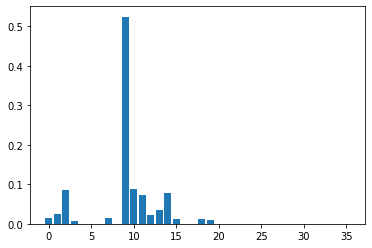

In [130]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

#Based on Xgboost Feature Imporantce we can say that X_10 have more Imporatant feature among All others ,X_11& X_13 & X_15 also have Importance &Time features don't have any imporantce

# Based on Base Model Feature Importance fetures buil a model
 

In [141]:
train_df =pd.read_csv('/content/Train.csv')
test_df =pd.read_csv('/content/Test.csv')

In [142]:
train_df_1 = train_df.drop(['INCIDENT_ID','DATE','MULTIPLE_OFFENSE','X_1','X_2','X_4','X_5','X_6','X_7','X_8','X_9','X_14'], axis = 1)

In [143]:
test_df_1 = test_df.drop(['INCIDENT_ID','DATE','X_1','X_2','X_4','X_5','X_6','X_7','X_8','X_9','X_14'], axis = 1)

#Imbalanced Data XGBoost Tunning

In [149]:
train['MULTIPLE_OFFENSE'].value_counts()

1    22606
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [ ]:
#scale_pos_weight = sqrt(count(negative examples)/count(Positive examples)) 


In [160]:
from math import sqrt

scale_pos_weight=  sqrt(1068/22606)

In [157]:
(1068/22606)

0.047244094488188976

In [156]:
scale_pos_weight

0.21735706680066552

In [144]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_df_1,train_df['MULTIPLE_OFFENSE'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [164]:
xgb = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=1,
                    min_child_weight=3,
                    gamma=1.2,
                    subsample=0.9,
                    colsample_bytree=0.6,
                  
                    objective='binary:logistic',
                    seed=27).fit(xtrain_bow, ytrain)

In [165]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
prediction = xgb.predict(xvalid_bow)
recall_score(yvalid, prediction, average='binary')

0.9982384028185555

Same accuracy we are getting 




In [166]:
prediction_3 = xgb.predict(test_df_1)

In [167]:
resul3 =pd.DataFrame()


In [170]:
resul3['INCIDENT_ID']  = test_df['INCIDENT_ID']

In [171]:
resul3['MULTIPLE_OFFENSE']  = prediction_3

In [172]:
resul3.to_csv('sub_imp.csv',index=False)

In [173]:
resul3['MULTIPLE_OFFENSE'] .value_counts()

1    15173
0      730
Name: MULTIPLE_OFFENSE, dtype: int64

# Model with (Important Feature from base mode) gives the best accuracy on test data  98.54 

#Imbalanced Data XGBoost Tunning